# Hierarchical Clustering

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters. It starts by treating each data point as a single cluster, then progressively merges (or splits) clusters until a single cluster remains.

Types of Hierarchical Clustering

Agglomerative (Bottom-up):

* Starts with each data point as its own cluster.
* Merges the closest pairs of clusters until one cluster is left.

Divisive (Top-down):

* Starts with all data points in one cluster.
* Recursively splits the clusters into smaller clusters.

How Agglomerative Clustering Works

* Initialization: Each data point is assigned to its own cluster.
* Iteration: Find the two closest clusters.
* Merge them into a single cluster.
* Termination: Repeat step 2 until only one cluster remains.

Example

Let's consider a simple example with five data points, represented by their coordinates in a 2D space:

A(1, 1)

B(1.5, 1.5)

C(5, 5)

D(5, 5.5)

E(10, 10)

Steps:

Initialization:

Each point is in its own cluster: {A}, {B}, {C}, {D}, {E}

Iteration 1:

* Calculate the distance between all pairs of clusters (using Euclidean distance, for example).
* The distance between A and B is the smallest.
* Merge A and B: {A, B}, {C}, {D}, {E}

Iteration 2:

* Calculate the distance between the new clusters.
* The distance between C and D is the smallest.
* Merge C and D: {A, B}, {C, D}, {E}

Iteration 3:

* Calculate the distance between the new clusters.
* Merge {A, B} and {C, D}: {A, B, C, D}, {E}

Iteration 4:

* Merge the last two clusters: {A, B, C, D, E}

Dendrogram

* The results of hierarchical clustering are usually visualized using a dendrogram, which is a tree-like diagram that shows the sequence of merges.

Interpretation:

* The leaves at the bottom represent the individual data points.
* The height of the vertical lines indicates the distance between the clusters that were merged.
* In this example, the dendrogram would show A and B merging first, followed by C and D, then {A, B} and {C, D}, and finally E joining the rest.

# Notebook Walkthrough

1. Import necessary dependencies
2. Import the dataset and perform initial analysis
3. Data preparation for cluster analysis
4. Hierarchical Clustering implementation strategy
5. Implementation of Hierarchical Clustering using Scipy Library
6. Implementation of Hierarchical Clustering using Sklearn Library


# 1. Import necessary dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import the dataset and perform initial analysis

In [2]:
df = pd.read_csv('entertainment.csv')

In [3]:
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [4]:
df.shape

(150, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         150 non-null    object 
 1   books        150 non-null    float64
 2   tv_shows     150 non-null    float64
 3   video_games  150 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


In [6]:
df.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


### Univariate analysis of the numerical columns

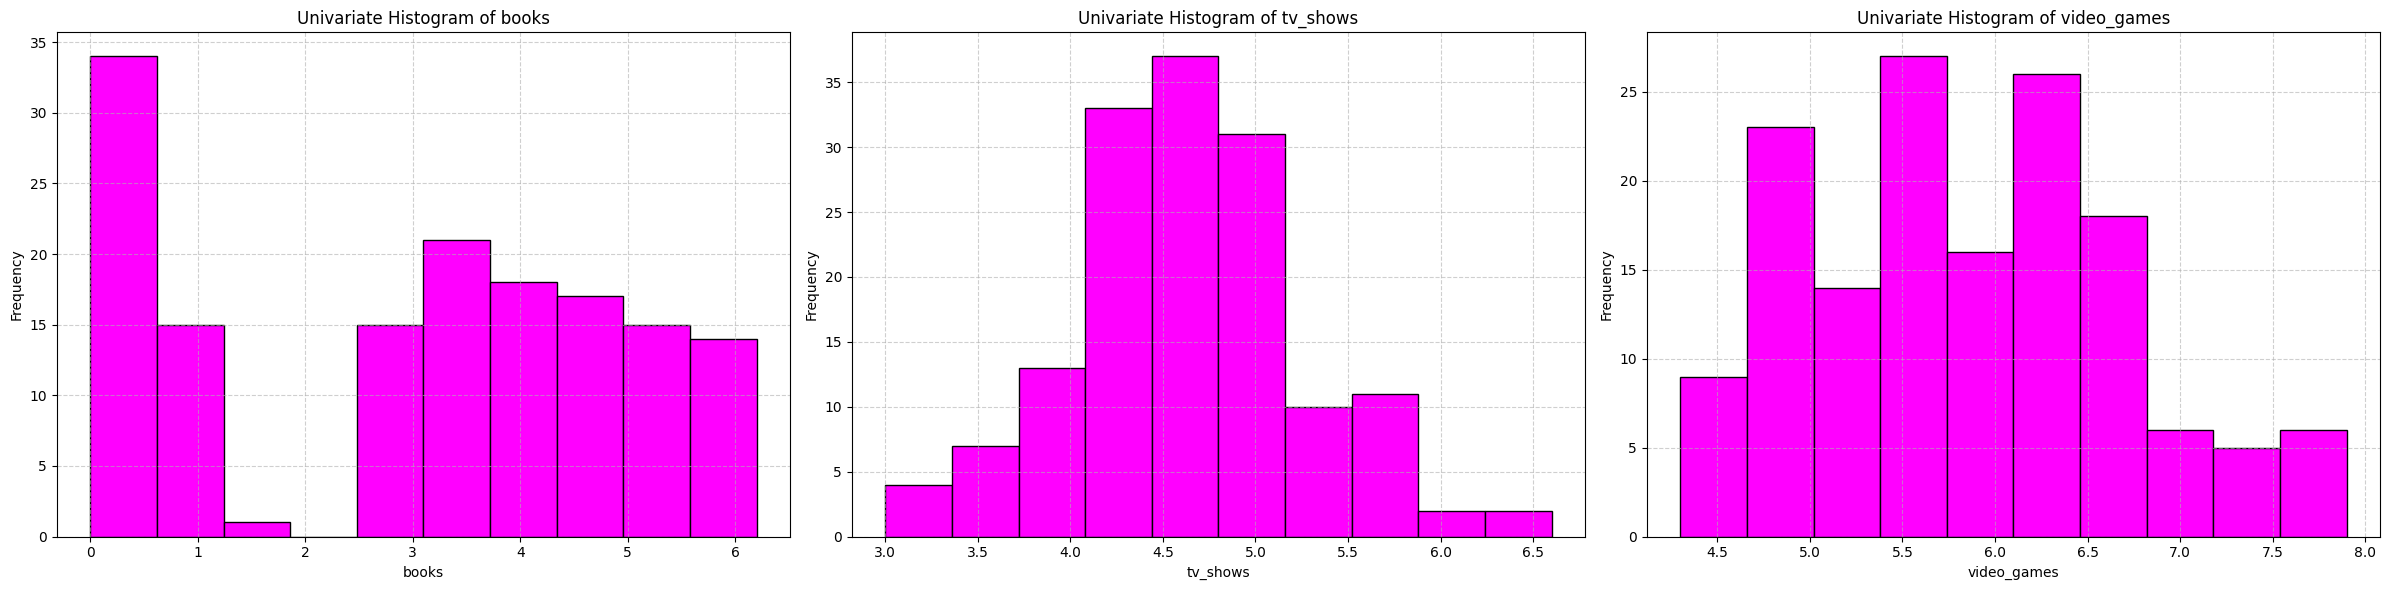

In [7]:
# List of the columns you want to create histograms for
columns_to_plot = ['books', 'tv_shows', 'video_games']

# Create a figure and a set of subplots
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(1, num_plots, figsize=(8 * num_plots, 6))  # Adjust figure width

# Create a histogram for each specified column in its respective subplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Select the current subplot
    df[column].hist(bins=10,color = 'magenta' , edgecolor='black', ax=ax)  # Use the 'ax' argument
    ax.set_title(f'Univariate Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

## Summarizing the insights

1. Books:

* The distribution for "books" appears to be right-skewed.
* There's a high frequency of individuals with very low scores (around 0-1).
* The frequency then decreases, with smaller peaks around the 3-4 range and then again around the 5-6 range.
* This suggests that most individuals in this dataset have a low affinity for books based on this metric, with fewer individuals showing higher levels of engagement.

2. TV Shows:

* The distribution for "tv_shows" seems to be approximately normal or slightly left-skewed.
* The highest frequency of individuals falls in the range of around 4.5 to 5.0. There are noticeable frequencies around the 4.0-4.5 range as well.
* The frequencies tend to decrease as the scores move away from this central tendency towards both lower and higher values.
* This suggests a relatively consistent and moderate level of engagement with TV shows across the individuals in the dataset.

3. Video Games:

* The distribution for "video games" appears to be multimodal, with several peaks.
* There are noticeable peaks in frequency around the 4.5-5.0 range, the 5.5-6.0 range, and possibly a smaller one around the 7.0-7.5 range.
* There are also lower frequencies in the ranges between these peaks.
* This indicates that there are distinct groups of individuals with different levels of engagement with video games, rather than a single central tendency.

In summary:

* Engagement with books is generally low, with a few individuals showing higher engagement.
* Engagement with TV shows is more consistent and centered around a moderate level.
* Engagement with video games shows distinct groups with varying levels of affinity, suggesting different preferences within the dataset.

# 3. Data preparation for cluster analysis

* Row granularity: This is generally important for hierarchical clustering as well.  You want each row to represent a distinct entity (user, customer, product) that you want to cluster.  The goal is to group similar entities, not individual events or actions.  So, the principle is the same.
* Missing value identification and handling: Yes, this is crucial for hierarchical clustering too.  Like K-means, hierarchical clustering relies on distance calculations to determine which data points or clusters are close to each other.  Missing values will disrupt these distance calculations and can lead to incorrect or meaningless results.  Imputation or removal of data points with too many missing values is necessary.
* Verify if all columns are numeric in nature: This is also a key requirement for most hierarchical clustering methods.  The standard distance metrics (Euclidean, etc.) used in hierarchical clustering are designed for numerical data. If you have categorical data, you'll need to convert it to a numerical representation (e.g., using one-hot encoding) before applying hierarchical clustering.  However, as we discussed, there are methods like using Gower's distance that can handle mixed data types in hierarchical clustering.
* Feature selection: Absolutely.  Feature selection is important for hierarchical clustering for the same reasons it's important for K-means.  Irrelevant or redundant features can obscure the true relationships between data points and lead to less meaningful clusters.  Selecting the most relevant features helps the algorithm focus on the most important dimensions of the data.
* Feature scaling: Yes, feature scaling is generally recommended for hierarchical clustering as well.  Just like in K-means, features with larger ranges can dominate the distance calculations in hierarchical clustering, leading to clusters that are primarily driven by those features.  Scaling (e.g., standardization or normalization) ensures that all features contribute more equally to the clustering process.

### 1. Row granularity

In [8]:
df.name.nunique() , df.shape

(150, (150, 4))

So their are 150 unique names which matches the rows in the dataset , so we are at the right level of granularity

### 2. Missing value identification and handling

In [9]:
df.isnull().sum()

,0
name,0
books,0
tv_shows,0
video_games,0


The data is clean , no missing value to handle

### 3. Verify if all columns are numeric in nature

In [10]:
df.dtypes

,0
name,object
books,float64
tv_shows,float64
video_games,float64


All columns are numeric in nature , other than name

### 4. feature selection ( Drop the name column )

In [11]:
data = df.drop(columns=['name'])

In [12]:
data

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6
...,...,...,...
145,5.2,4.6,6.9
146,6.0,4.6,6.7
147,5.5,5.7,7.7
148,0.0,6.1,5.2


### 5. Feature scaling

In [13]:
data.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


Since all the features are in the same range we can skip feature scaling for now

# 4. Hierarchical Clustering implementation strategy

Both SciPy and scikit-learn provide implementations of hierarchical clustering.

* SciPy (scipy.cluster.hierarchy) offers a wide range of hierarchical clustering functions, focusing on the linkage criteria.
* Scikit-learn (sklearn.cluster.AgglomerativeClustering) provides a more object-oriented approach to hierarchical clustering.



# 5. Implementation of Hierarchical Clustering using Scipy Library

In [14]:
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


### Implementation of Hierarchical Clustering

Understanding the Dendrogram

A dendrogram is a tree-like diagram that visually represents the sequence of fusions or divisions in hierarchical clustering. It shows how data points or clusters are progressively merged (agglomerative) or split (divisive) at different stages of the algorithm.

Key Components

* Leaves: Each leaf at the bottom of the dendrogram represents an individual data point. In your image, the leaves are labeled as "Data Points."
* Branches (Vertical Lines): The vertical lines represent the joining of data points or clusters. The height of a vertical line indicates the distance (or dissimilarity) between the clusters that were merged.
* Horizontal Lines: The horizontal lines connect the clusters that are merged.
* Height: The height of the merge, measured on the y-axis (labeled as "Euclidean Distance" in your dendrogram), indicates the distance between the merged clusters.

Linkage method:  

The linkage method used in the linkage function.  It determines how the distance between clusters is calculated.  Common values include:

* 'ward':  Minimizes the variance of distances within clusters.
* 'complete':  Uses the maximum distance between points in two clusters.
* 'average':  Uses the average distance between points in two clusters.
* 'single':  Uses the minimum distance between points in two clusters.

The choice of linkage method can significantly affect the resulting clustering.

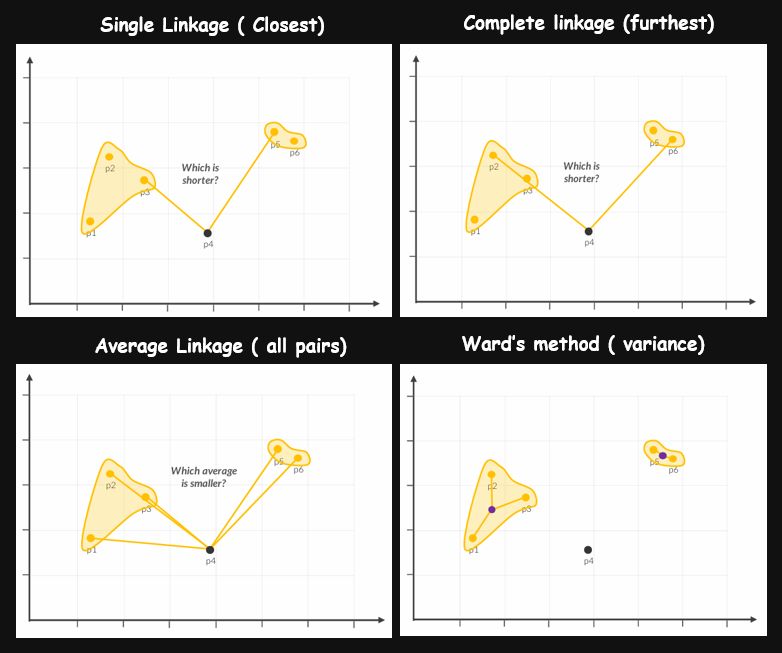

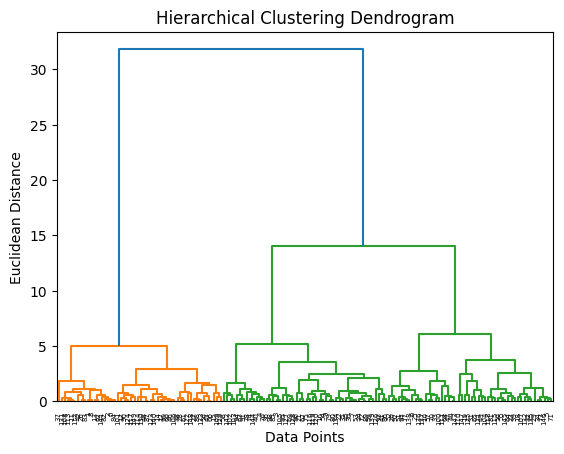

In [15]:
# visualize the clusters with a dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

## Interpretation of the dendogram


* Initial Stage: At the very bottom of the dendrogram (y-axis value of 0), each data point is considered its own cluster.
* Merging Process: As we move up the dendrogram, the shortest vertical lines indicate the closest data points or clusters that are merged first. For instance, several data points merge at very short distances, indicating they are quite similar to each other.
* Cluster Formation: As we continue moving upwards, clusters are progressively merged. The height of the vertical lines at each merge shows the distance between the clusters being combined.  Longer vertical lines indicate that the clusters being merged are more dissimilar.
* Identifying Clusters: To identify clusters, you can draw a horizontal line across the dendrogram at a chosen distance threshold. The vertical lines that intersect this horizontal line indicate the data points or clusters that belong to the same cluster.  For example:

  * If you draw a horizontal line at a Euclidean distance of around 5, you'd see several small clusters.
  * If you draw a line at a distance of around 10, you'd end up with 3 big clusters.
  * If you draw a line at a distance above 15 , you would end up with 2 big clusters.

Final Insight:  Upon visual inspection, there are clearly three clusters and to
see them seperately Updating the color threshold to 10.

## Updating the color threshold for final cluster visualization

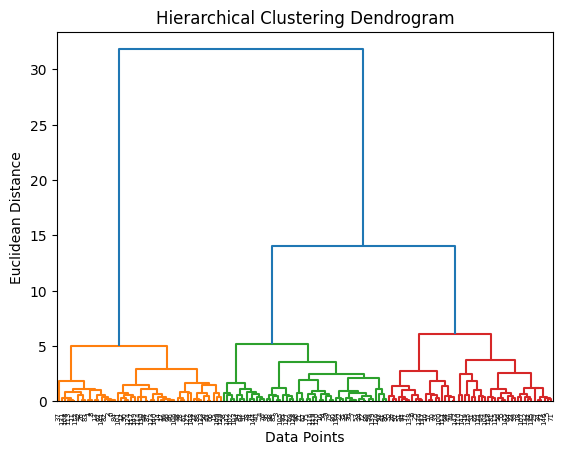

In [16]:
# visualize the clusters with a dendrogram with color_threshold = 10
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=10)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

# 6. Implementation of Hierarchical Clustering using Sklearn Library

The code performs hierarchical clustering using scikit-learn's AgglomerativeClustering class.

* It imports the AgglomerativeClustering class.
* It creates an instance of AgglomerativeClustering with n_clusters=3, specifying that it should form 3 clusters.
* It then calls the fit() method of the AgglomerativeClustering object, passing in the data (data). The fit() method computes the hierarchical clustering based on the input data.  The result of the clustering is stored within the agg object. To get the cluster labels, you would then use agg.labels_.

We are considering 3 clusters because in the Scipy based implementation above we got 3 cluster as the logical grouping

## Build the Hierarchical clustering model with 3 clusters

In [17]:
# hierarchical clustering with sklearn, with 3 clusters

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(3)
agg.fit(data)

AgglomerativeClustering(n_clusters=3)

In [18]:
# view the 3 cluster labels
agg.labels_

array([1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1])

In [19]:
pd.Series(agg.labels_).head()

,0
0,1
1,1
2,1
3,2
4,2


In [20]:
import pandas as pd

pd.Series(agg.labels_).value_counts()

,count
1,50
2,50
0,50


## Visualize the cluster map

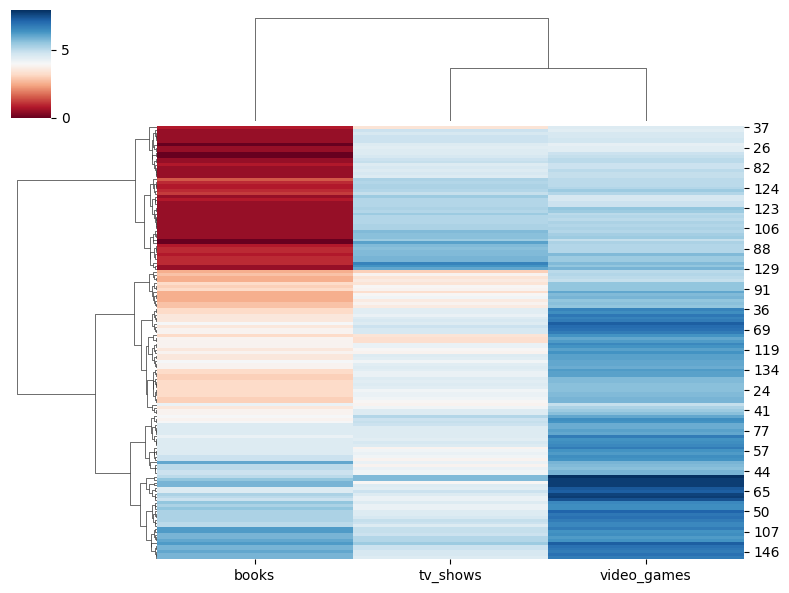

In [21]:
# create a cluster map for visualization

clustermap = sns.clustermap(data, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data.columns)
plt.show()

The dendogram in sklearn matches with scipy dendogram in the following way ( read the scipy dendogram read horizontally from left to right which is same as the sklearn dendogram read vertically from top to bottom

Cluster interpretation :

* Cluster 1 : Non Readers ( dark red for books )
* Cluster 2 : Typical Students ( neutral to blue as we go from left to right )
* Cluster 3 : Video Game lovers ( very dark blue for video_games )

In [21]:
Cluster_labels = pd.Series(agg.labels_, name='Cluster_labels')

## Map the cluster labels to the original dataset

In [22]:
# Join the DataFrames and Series
# 1. Join 'df' and 'data' on their implicit index.  Using .join().
combined_df = df.join(data, rsuffix='_data')

# 2. Join the resulting DataFrame with the 'Cluster labels' Series.
final_df = combined_df.join(Cluster_labels)

# Select the desired columns
final_df = final_df[['name', 'books', 'tv_shows', 'video_games', 'Cluster_labels']]


In [23]:
final_df

,name,books,tv_shows,video_games,Cluster_labels
0,Aaliyah,0.5,4.6,4.9,1
1,Abigail,0.0,4.5,4.8,1
2,Addison,0.5,4.5,5.0,1
3,Adeline,3.5,4.5,6.6,2
4,Alana,2.8,3.8,5.6,2
...,...,...,...,...,...
145,Winifred,5.2,4.6,6.9,0
146,Xanthe,6.0,4.6,6.7,0
147,Zara,5.5,5.7,7.7,0
148,Zoe,0.0,6.1,5.2,1


The problem that we face is how do we know which cluster label is associated with which cluster name , since books are point of difference between the 3 clusters with low , moderate and high values

Unlike K-means clustering we don't have a direct function to get cluster centres per cluster , so we will create 3 subset dataframes with cluster_labels as 0 , 1 , 2 and take means of them

## Creating the cluster centers per group

In [35]:
# Get the unique cluster labels
cluster_labels = final_df['Cluster_labels'].unique()

# Iterate through each cluster label
for label in cluster_labels:
    # Filter the DataFrame to get data points belonging to the current cluster
    cluster_data = final_df[final_df['Cluster_labels'] == label]

    # Calculate the mean of the numerical columns for the current cluster
    #  We exclude 'name' and 'Cluster labels' as they are not numerical
    cluster_center = cluster_data[['books', 'tv_shows', 'video_games']].mean()

    print(f"Cluster {label} Center:")
    print(cluster_center)
    print("-" * 20)

Cluster 1 Center:
books          0.596
tv_shows       5.130
video_games    5.006
dtype: float64
--------------------
Cluster 2 Center:
books          3.290
tv_shows       4.076
video_games    5.920
dtype: float64
--------------------
Cluster 0 Center:
books          5.094
tv_shows       4.552
video_games    6.604
dtype: float64
--------------------


## Observation

Consider the 50% line for all the dataframes describe

* Cluster Label == 1 has least values for books , so they are the Non Readers
* Cluster Label == 2 has moderate values for books , so they are Typical Students
* Cluster Label == 0 has the highest values for books and also for video games , so they are the Video Games Lovers

In [36]:
# Create the mapping dictionary
cluster_name_mapping = {
    0: 'Video Game Lovers',
    2: 'Typical Students',
    1: 'Non Readers'
}

# Use the .map() function to replace the values in the 'Cluster_labels' column
final_df['Cluster_names'] = final_df['Cluster_labels'].map(cluster_name_mapping)

In [37]:
final_df

,name,books,tv_shows,video_games,Cluster_labels,Cluster_names
0,Aaliyah,0.5,4.6,4.9,1,Non Readers
1,Abigail,0.0,4.5,4.8,1,Non Readers
2,Addison,0.5,4.5,5.0,1,Non Readers
3,Adeline,3.5,4.5,6.6,2,Typical Students
4,Alana,2.8,3.8,5.6,2,Typical Students
...,...,...,...,...,...,...
145,Winifred,5.2,4.6,6.9,0,Video Game Lovers
146,Xanthe,6.0,4.6,6.7,0,Video Game Lovers
147,Zara,5.5,5.7,7.7,0,Video Game Lovers
148,Zoe,0.0,6.1,5.2,1,Non Readers


## Final Cluster Visualization and interpretation

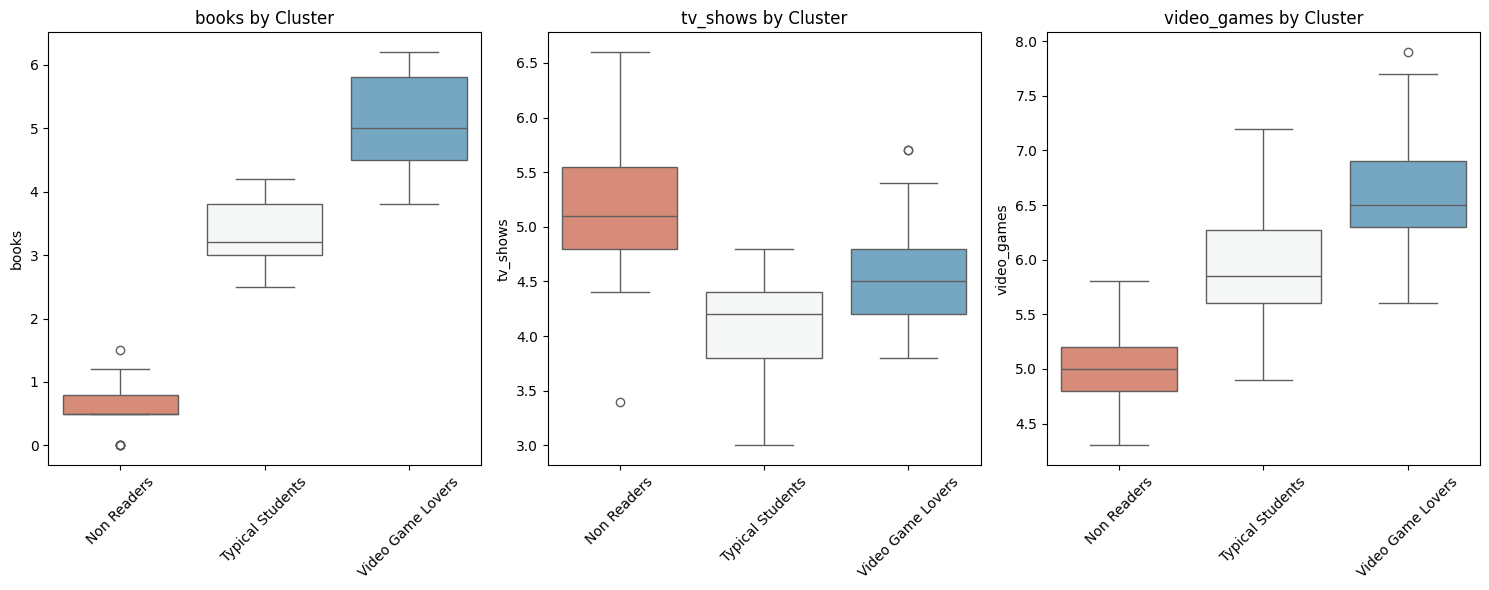

In [47]:
# List of columns to create boxplots for
columns_to_plot = ['books', 'tv_shows', 'video_games']
num_plots = len(columns_to_plot)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 6 * num_rows))  # Adjust figsize

# Iterate through the columns and create boxplots
for i, column in enumerate(columns_to_plot):
    row_index = i // 3
    col_index = i % 3

    # Handle the case where there are more rows than needed for the last plots
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

    sns.boxplot(x='Cluster_names', y=column, hue='Cluster_names', data=final_df, palette='RdBu', ax=ax)
    ax.set_title(f'{column} by Cluster')
    ax.set_ylabel(column)
    ax.set_xlabel('')  # Remove the x-axis label "Cluster_names"
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove any empty subplots if the number of plots is not a multiple of 3
if num_plots < num_rows * 3:
    for j in range(num_plots, num_rows * 3):
        fig.delaxes(axes[num_rows - 1, j % 3]) if num_rows > 1 else fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Interpreting the Boxplots

The boxplots compare the distributions of 'books', 'tv_shows', and 'video_games' consumption across three clusters: 'Non Readers', 'Typical Students', and 'Video Game Lovers'.

Books:

* 'Non Readers' have the lowest book consumption. Most data points are close to zero, with a few outliers.
* 'Typical Students' show a moderate range of book consumption, with the median around 3.
* 'Video Game Lovers' exhibit the highest book consumption, with the median above 4.

TV Shows:

* 'Non Readers' have a wider range of tv_shows consumption, with the median around 5.
* 'Typical Students' have the lowest tv_shows consumption, with the median around 4.
* 'Video Game Lovers' show a moderate range, similar to Non-Readers

Video Games:

* 'Non Readers' have the lowest video_games consumption, with the median around 5.
* 'Typical Students' show a moderate and wide range of video_games consumption
* 'Video Game Lovers' have the highest video_games consumption, with the median around 6.5 and some high outliers.

In summary

* 'Non Readers' are characterized by low book consumption and moderate consumption of tv shows and video games.
* 'Typical Students' show moderate consumption of books and tv shows, and video games.
* 'Video Game Lovers' are characterized by high consumption of video games and books, but a moderate consumption of tv shows.

# Summarization

* Scipy is a good choice to find out optimum number of clusters visually for hierarchical clustering
* Once we have the number of clusters we can leverage AgglomerativeClustering in sklearn to build the clusters . Since all the other types of clustering are done in sklearn it will be easier to compare different types of clusters in sklearn
